# Fundamental of Data analysis TASKS
                    


## Task 1 - **Collatz conjecture**
by Andreia Santos

DATE: October, 15th 2023
***

In [1]:

def f(x):
  # Divide by 2 if number is even
  if x% 2==0:
    return x//2
   # Is not even multiply by 3 and add 1
  else:
    return x*3+1

In [2]:
def collatz(x):
  print (f'Testing the collatz sequence for the number {x}')
  while x!=1:
    print (x, end =',')
    x=f(x)
  print (x)

In [3]:
collatz(10000)

Testing the collatz sequence for the number 10000
10000,5000,2500,1250,625,1876,938,469,1408,704,352,176,88,44,22,11,34,17,52,26,13,40,20,10,5,16,8,4,2,1


*** 

## Task 2 - **Variables types**
by Andreia Santos

DATE: November, 12th 2023
***

In [3]:
import pandas as pd
data = pd.read_csv('penguins.csv')
data.head() # to display the first 5 lines of loaded data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Access the types of variable on the pinguins data set

In [5]:
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Estimate how many different values there is on each type of the variable

In [6]:
data.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

Specify the unique values withing each variable

In [7]:
pd.Series(list(map(set,data.values.T)),index=data.columns)

species                                    {Adelie, Chinstrap, Gentoo}
island                                      {Dream, Torgersen, Biscoe}
bill_length_mm       {49.4, 49.9, 45.7, 50.4, 32.1, 33.1, 33.5, 35....
bill_depth_mm        {13.2, 14.1, 15.9, 16.7, 17.4, 18.4, 19.0, 20....
flipper_length_mm    {nan, 172.0, 174.0, 176.0, 178.0, 179.0, 180.0...
body_mass_g          {3075.0, 4100.0, 3600.0, 4625.0, 5650.0, 3100....
sex                                                {FEMALE, nan, MALE}
dtype: object

#### Answer:
The penguins data set is a matrix that characterizes 342 pinguins characterized over 7 features: species, island, bill_length, bill_depth, flipper_length, body mass and sex. 
The different types of features are organized in categorical and numerical variables. 

The categorical are: species, island and sex. These are categorical variables that represent different population groups: species (3 different types: Adelie', 'Chinstrap', 'Gentoo'), island (3 differnt locations: 'Torgersen', 'Biscoe', 'Dream') and sex (3 different types: female, male or unkonwn).
The numerical are: bill_length, bill_depth, flipper_length and body- mass. These are continuos numerical variables measured or either milimeters or grams (body-mass only) which correspond to physical characteristics of the pinguins. 

Whenever  possible data types should be saved/operated as integer once they consume less memory than float number.However note that not all variable are adequate to be handle as integers types. When there is the need of performing divisions float type should be used despite more memory consuming. 
The ideal types of variable for this pinguins data set will be dependent on the purpose of the analyse.
For example a regresssion analysis can be run between the variable body mass and any other numerical variable (bill_length, bill_depth, flipper_length ) and analyse dependency on the data. Or either classification studies can be run in order to predict the specie type based on al the numerical variables. 


## Task 3 - **Probability distribution**
by Andreia Santos

DATE: November, 23th 2023
***

#### Answer:
The probability distribution for each variable will be dependent on the type of variable. As already detailed on the previous question no.2 answer, mainly there is two types of variables on the penguins dataset: categorical and continuous. 
On these continous variables the suggested distribution is a normal distribution. All these variables correspond to observation of natural phenomenas which often respect a normal distribution. One important characteristic of this normal distribution is that values assume a bell shape curve wich is symetrical around a central value.  A statistics analysis can be conducted to each individual variable in order to verify its agreement with a normal distribution. Estimators as average, standart deviation, kurtosis, skewness, median are examples of statistics analysis. 
On the categorical variables two distinct distributions are suggested: multinomial for "species" and "islands" variables. Both variable have more that on possible output. Each penguin will fall in one of the tree possible options for each of this mentioned variables.However for "sex" variable only two outputs are possible, and the suggested distribution is the binominal. 


***

## Task 4 - **Probability of fliping a coins**
by Andreia Santos

DATE: November, 26th 2023
***

***

## Task 5 - **Individual Plots**
by Andreia Santos

DATE: November, 26th 2023
***

#### Answer:


In [103]:
# upload needed libraries

import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sps 
from scipy import stats


In [104]:
# Prepare the data set - remove the nan

data_clean = data.dropna()

In [105]:
#This function intend is to evaluate how the data is distributed. The normal distribution proobability density function was fited to the data

def conti_variable(variable,color):

  # Plot the histogram
  plt.hist(x=variable, bins="auto", color=color,alpha=0.9, rwidth=0.6,density=True)


  #print("the amount in each individual bin is", n)
  #print("the bins are located at ", bins)
  #print("the total no. of bins is:", patches)


  # Fit data to a normal distribution
  params = stats.norm.fit(variable)
  normal_dist = stats.norm(*params)


  # Plot the PDF of the fitted distribution
  x = np.linspace(min(variable), max(variable), 100)
  plt.plot(x, normal_dist.pdf(x), 'k-', label='Normal PDF')

  # Perform a Kolmogorov-Smirnov test
  kstest_result = stats.kstest(variable, 'norm', params)

  plt.legend()
  #plt.show()
  print("Kolmogorov-Smirnov test result:", kstest_result)
  print(sep='\n\n\n\n\n\n')
  print (variable.name)
  
  if kstest_result.pvalue > 0.05:
     print("Fail to reject the null hypothesis. Data may follow a normal distribution.")
  else:
    print("Reject the null hypothesis. Data significantly deviates from a normal distribution.")
    

   

In [146]:
#This function intend is to evaluate how the data is distributed within the categorical variables

def cate_variable(variable, color):
  unique_species = variable.unique()
  species_counts = variable.value_counts()
 
  species_counts.plot(kind='bar', color=color)


Kolmogorov-Smirnov test result: KstestResult(statistic=0.08011119540955447, pvalue=0.02630859640928984, statistic_location=17.8, statistic_sign=-1)

bill_depth_mm
Reject the null hypothesis. Data significantly deviates from a normal distribution.
Kolmogorov-Smirnov test result: KstestResult(statistic=0.07123428082378663, pvalue=0.06486210857795327, statistic_location=41.1, statistic_sign=1)

bill_length_mm
Fail to reject the null hypothesis. Data may follow a normal distribution.
Kolmogorov-Smirnov test result: KstestResult(statistic=0.12510215891210075, pvalue=5.309415498465743e-05, statistic_location=197.0, statistic_sign=1)

flipper_length_mm
Reject the null hypothesis. Data significantly deviates from a normal distribution.
Kolmogorov-Smirnov test result: KstestResult(statistic=0.10589032496917367, pvalue=0.0010498840305136644, statistic_location=3950.0, statistic_sign=1)

body_mass_g
Reject the null hypothesis. Data significantly deviates from a normal distribution.


(0.0, 1.0, 0.0, 1.0)

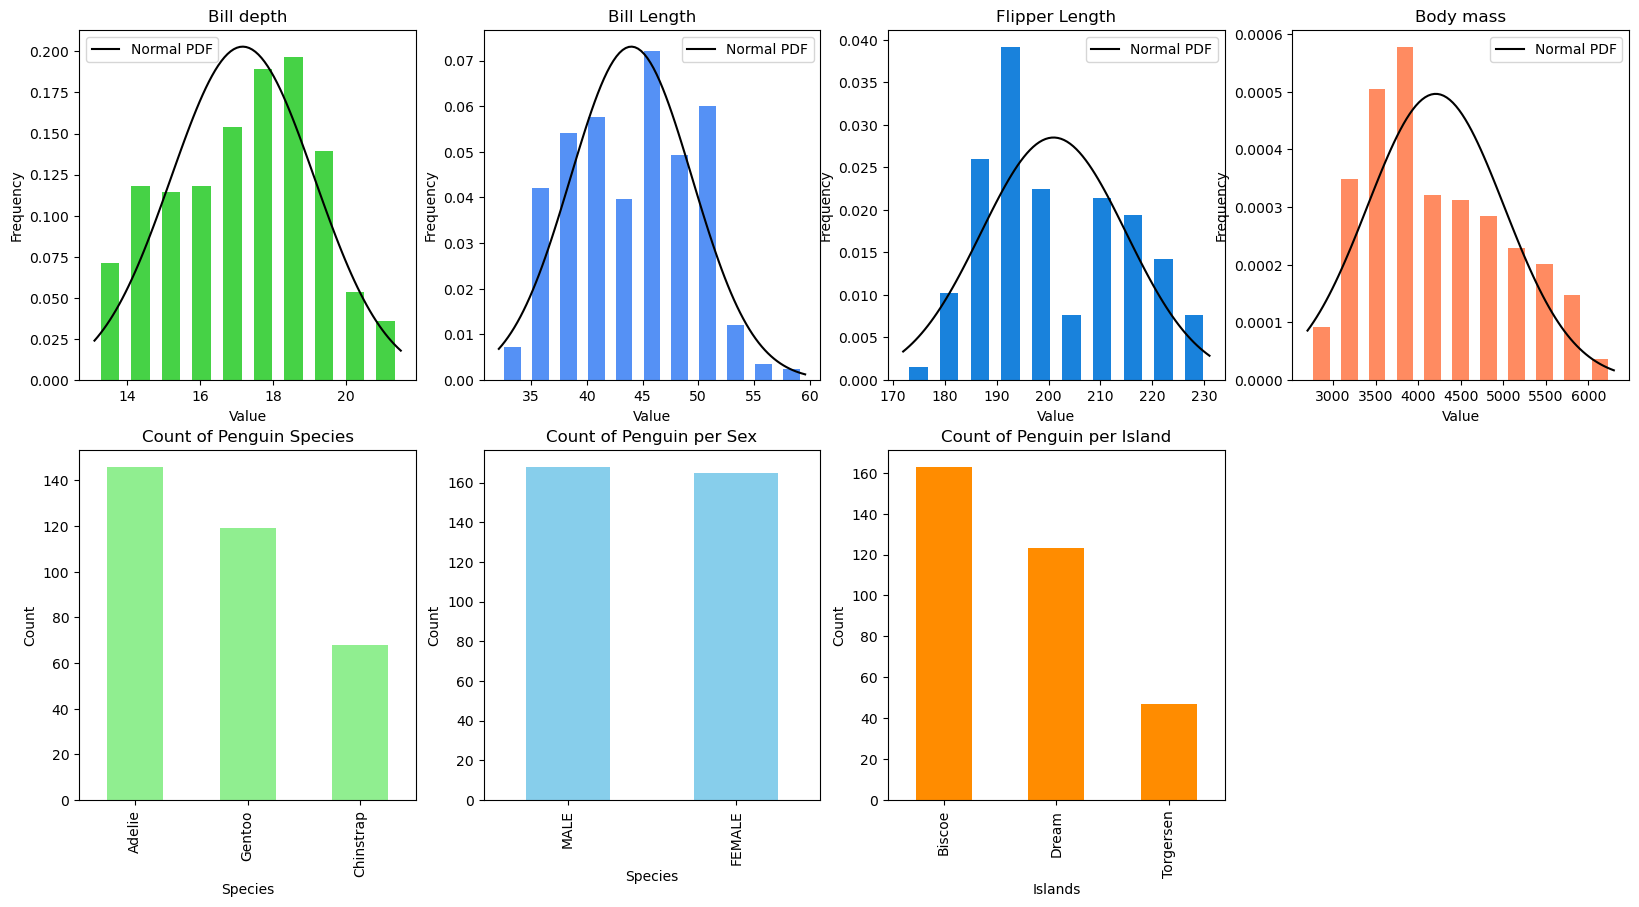

In [149]:
 ###################################################### CONTINUOUS VARIABLES


# create the plot for all variables
fig, axs = plt.subplots(2, 4, figsize=(20, 10)) 

plt.subplot(2, 4, 1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Bill depth')
conti_variable(data_clean["bill_depth_mm"],'#32CD32')


plt.subplot(2, 4, 2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Bill Length')
conti_variable(data_clean["bill_length_mm"],'#4285f4')


plt.subplot(2, 4, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Flipper Length')
conti_variable(data_clean["flipper_length_mm"],'#0074d9')


plt.subplot(2, 4, 4)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Body mass')
conti_variable(data_clean["body_mass_g"], '#FF7F50')


###################################################### CATEGORICAL VARIABLES

plt.subplot(2, 4, 5)
plt.title('Count of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
cate_variable(data_clean["species"], 'lightgreen')



plt.subplot(2, 4, 6)
plt.title('Count of Penguin per Sex')
plt.xlabel('Species')
plt.ylabel('Count')
cate_variable(data_clean["sex"], 'skyblue')

plt.subplot(2, 4, 7)
plt.title('Count of Penguin per Island')
plt.xlabel('Islands')
plt.ylabel('Count')
cate_variable(data_clean["island"], 'darkorange')

plt.subplot(2, 4, 8)
plt.axis('off')



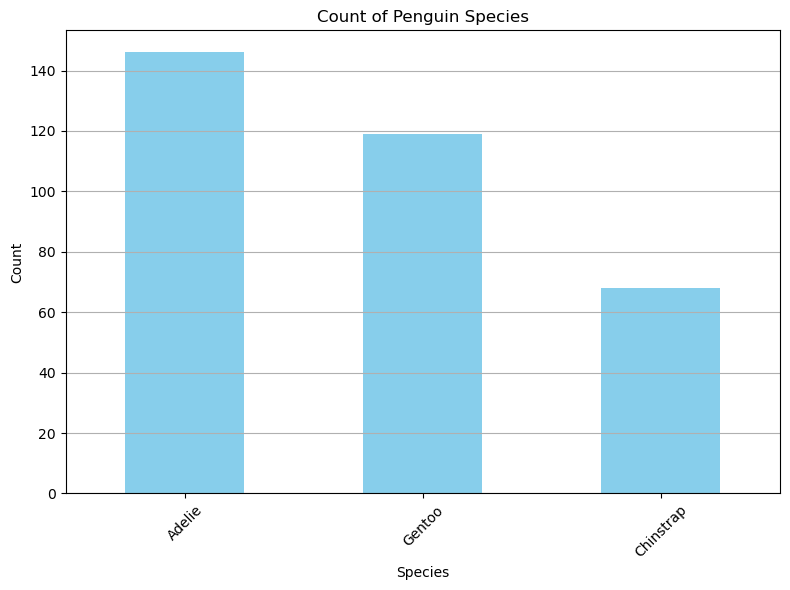

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming species_counts contains the count of each unique species as obtained earlier
# species_counts = data_clean["species"].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
plt.grid(axis='y')  # Show gridlines on y-axis
plt.tight_layout()
plt.show()

